<a href="https://colab.research.google.com/github/YuriiKlim/AI/blob/lesson4/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%BD%D0%B0_%D0%B0%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%B4%D0%B0%D0%BD%D0%B8%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів та даних

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
sales = pd.read_csv(
    'https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/bike_sales.csv',
    index_col = "Unnamed: 0",
    parse_dates=['Date'])

In [7]:
sales.columns = sales.columns.str.lower()

In [10]:
sales.head()

,date,day,month,year,customer_age,age_group,customer_gender,country,state,product_category,sub_category,product,order_quantity,unit_cost,unit_price,profit,cost,revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


# Завдання 1
Виведіть середнє значення та медіану для `order_quantity`. Чи є викиди?

In [24]:
sales['order_quantity'].describe()

count    113036.000000
mean         11.901660
std           9.561857
min           1.000000
25%           2.000000
50%          10.000000
75%          20.000000
max          32.000000
Name: order_quantity, dtype: float64

In [16]:
mean_order_quantity = sales['order_quantity'].mean()

mean_order_quantity

11.901659648253654

In [17]:
median_order_quantity = sales['order_quantity'].median()

median_order_quantity

10.0

In [30]:
Q1 = sales['order_quantity'].quantile(0.25)
Q3 = sales['order_quantity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = sales[(sales['order_quantity'] < lower_bound) | (sales['order_quantity'] > upper_bound)]

outliers

,date,day,month,year,customer_age,age_group,customer_gender,country,state,product_category,sub_category,product,order_quantity,unit_cost,unit_price,profit,cost,revenue


# Завдання 2
Намалюйте гістограму та ящик з вусами для `order_quantity`

<Axes: >

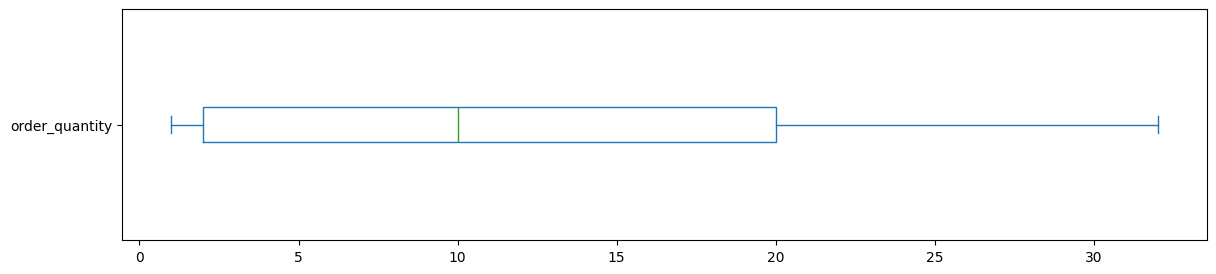

In [23]:
sales['order_quantity'].plot(kind='box', vert=False, figsize=(14,3))

# Завдання 3
Очистіть дані від викидів. Алгоритм:

1. Обчислюємо нижній `q1` та верхній `q3` квантилі
2. Обчислюємо медіану `median`
3. Очислюємо значення `IQR = q3 - q1`
4. Обчислюємо `lower = q1 - 1.5*IQR`
5. Обчислюємо `upper = q3 + 1.5*IQR`
6. Викидами вважаємо значення які `< lower` або `>upper`

In [44]:
def remove_outliers(sales):
    for column in sales.select_dtypes(include=[float, int]).columns:
        q1 = sales[column].quantile(0.25)
        q3 = sales[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        sales = sales[(sales[column] >= lower_bound) & (sales[column] <= upper_bound)]
    return sales

cleaned_sales = remove_outliers(sales)

cleaned_sales

,date,day,month,year,customer_age,age_group,customer_gender,country,state,product_category,sub_category,product,order_quantity,unit_cost,unit_price,profit,cost,revenue
1048,2014-01-04,4,January,2014,53,Adults (35-64),M,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,3,4,10,12,12,24
1049,2014-01-04,4,January,2014,53,Adults (35-64),M,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,15,4,10,59,60,119
1050,2016-01-04,4,January,2016,53,Adults (35-64),M,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,3,4,10,12,12,24
1051,2016-01-04,4,January,2016,53,Adults (35-64),M,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,13,4,10,51,52,103
1052,2014-04-26,26,April,2014,53,Adults (35-64),M,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,8,4,10,31,32,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113015,2015-12-10,10,December,2015,20,Youth (<25),F,United States,Washington,Clothing,Vests,"Classic Vest, M",6,24,64,156,144,300
113028,2013-12-28,28,December,2013,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",2,24,64,75,48,123
113029,2015-12-28,28,December,2015,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",2,24,64,75,48,123
113030,2014-04-12,12,April,2014,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",6,24,64,225,144,369


# Завдання 4
Ввиведіть гістограму з кількістю чоловіків та жінок серед покупців.

# Завдання 5
Виведіть точкову діаграму для ознак `order_quantity` та `revenue`

# Завдання 6
Знайдіть категоріальну характеристику, від якої залежить ознака `profit`